<a href="https://colab.research.google.com/github/jaudi/two_stock_info/blob/main/BTC_NASDAQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
ticker="BTC-USD"
ticker2="^IXIC"
start_date="2019-01-01"
end_date="2024-10-01"
df=yf.download(ticker, period="5y")
df2=yf.download(ticker2, period="5y")
df.columns=["Adj Close","Close","High","Low", "Open", "Volume"]
df2.columns=["Adj Close", "Close", "High", "Low", "Open", "Volume"]



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Calculate of accumulated returns


In [114]:
df["Acc Returns"]=((1+df["Close"].pct_change()).cumprod()-1)*100
df2["Acc Returns"]=((1+df2["Close"].pct_change()).cumprod()-1)*100
data=pd.concat([df["Acc Returns"], df2["Acc Returns"]], axis=1)
data.columns=[ticker, ticker2]
data.head()

,BTC-USD,^IXIC
Date,,
2019-10-31 00:00:00+00:00,NaN,NaN
2019-11-01 00:00:00+00:00,0.668721,1.134056
2019-11-02 00:00:00+00:00,1.360201,NaN
2019-11-03 00:00:00+00:00,0.388817,NaN
2019-11-04 00:00:00+00:00,2.315619,1.698429


In [115]:

data=data.ffill()
data=data.fillna(0)

data.head()

,BTC-USD,^IXIC
Date,,
2019-10-31 00:00:00+00:00,0.000000,0.000000
2019-11-01 00:00:00+00:00,0.668721,1.134056
2019-11-02 00:00:00+00:00,1.360201,1.134056
2019-11-03 00:00:00+00:00,0.388817,1.134056
2019-11-04 00:00:00+00:00,2.315619,1.698429


Text(0.5, 1.0, 'BTC vs NASDAQ returns %')

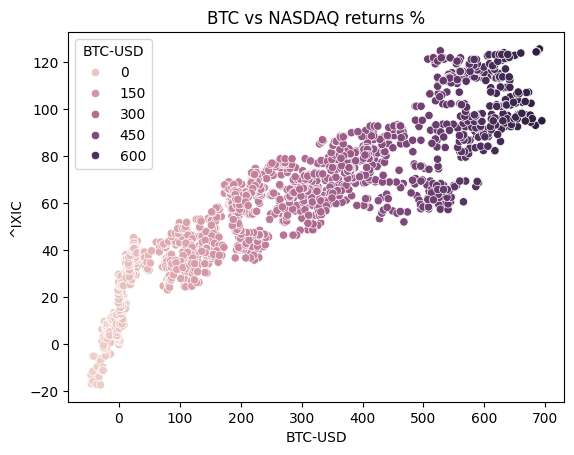

In [116]:
import seaborn as sns
sns.scatterplot(data=data, x=ticker, y=ticker2,hue=ticker)
plt.title("BTC vs NASDAQ returns %")


Text(0.5, 1.0, 'BTC vs NASDAQ correlation')

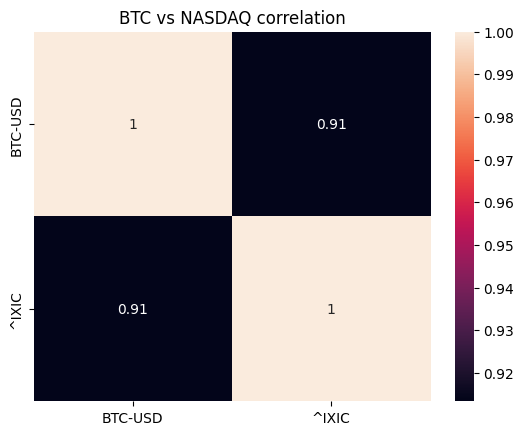

In [117]:


sns.heatmap(data.corr(), annot=True)
plt.title("BTC vs NASDAQ correlation")

In [118]:
correlation = data[['^IXIC', 'BTC-USD']].corr()
print(correlation)

            ^IXIC   BTC-USD
^IXIC    1.000000  0.913354
BTC-USD  0.913354  1.000000


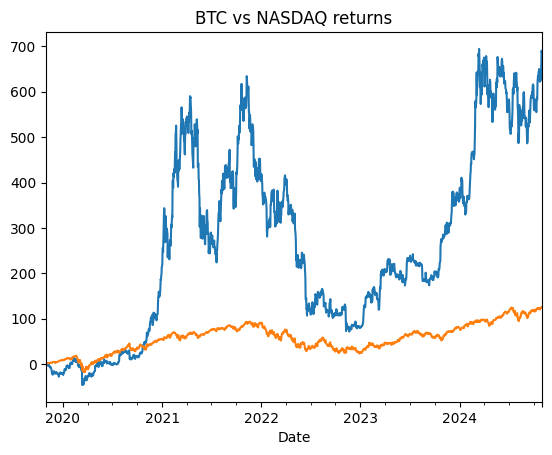

In [119]:
import matplotlib.pyplot as plt
ax=df["Acc Returns"].plot(kind="line", label="BTC")
ax.set_title("BTC vs NASDAQ returns")
ax2=df2["Acc Returns"].plot(kind="line", label="NASDAQ")

plt.show()

In [126]:
# Corrección en el cálculo de la rentabilidad anualizada
rentabilidad_anualizada_BTC_USD = ((df.tail(1)['Close'].values[0] / df.head(1)['Close'].values[0]) ** (1 / 5)) - 1
rentabilidad_anualizada_NASDAQ = ((df2.tail(1)['Close'].values[0] / df2.head(1)['Close'].values[0]) ** (1 / 5)) - 1

# Impresión de los resultados en porcentaje
print(f"Rentabilidad anualizada BTC: {rentabilidad_anualizada_BTC_USD * 100:.2f}%")
print(f"Rentabilidad anualizada NASDAQ: {rentabilidad_anualizada_NASDAQ * 100:.2f}%")



Rentabilidad anualizada BTC: 51.00%
Rentabilidad anualizada NASDAQ: 17.54%


In [125]:
df.tail(1)['Close']

AttributeError: 'Series' object has no attribute 'series'